In [19]:
import pandas as pd 
df = pd.read_excel("../data/NAFLD.xlsx")

In [20]:
df.head()

,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
0,1,60,1,150,80,35.56,119.0,104.0,135,77,...,2,1,4,1,1,0,0,0,1,2
1,2,55,1,154,73,30.78,101.0,98.0,120,72,...,2,0,4,1,0,0,0,0,1,2
2,3,53,2,170,101,34.95,116.0,112.0,120,80,...,2,3,4,1,1,1,1,0,1,2
3,4,33,2,175,95,31.02,114.0,114.0,124,83,...,2,1,4,1,1,0,0,0,1,2
4,5,23,2,162,68,25.91,101.0,97.0,124,79,...,2,0,4,1,0,0,0,0,1,2


In [21]:
df.columns

Index(['Patient No.', 'Age', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Waist Circumference', 'Hip Circumference',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)',
       'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Microalbumin Spot Urine', 'Microalbumin/Creatinine Ratio',
       'TSH', 'CK', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'PT', 'INR',
       'Vitamin D', 'Ferritin', 'Ceruloplasmin', 'C Peptide', 'Glucose',
       'Insulin', 'HOMA',
       'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
       'U

In [22]:
df["Activity"].unique()


array([2, 1, 3, 4, 0])

In [23]:
feature_cols = [
  'Age', 'Gender (Female=1, Male=2)', 'Body Mass Index', 'Waist Circumference', 'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)', 'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)', 'AST', 'ALT', 'ALP', 'GGT', 'Total Cholesterol', 'Triglycerides', 'HDL', 'LDL', 'Glucose', 'Insulin', 'Hemoglobin - A1C', 'Leukocyte', 'Hemoglobin', 'Trombosit', 'Creatinine', 'Uric Acid', 'BUN', 'Albumin', 'Total Bilirubin', 'Total Protein', 'Vitamin D', 'Ferritin'
    
]


In [24]:
x = df[feature_cols]


In [25]:
x.head()

,Age,"Gender (Female=1, Male=2)",Body Mass Index,Waist Circumference,"Diyabetes Mellitus (No=0, Yes=1)","Hypertension (No=0, Yes=1)","Hyperlipidemia (No=0, Yes=1)","Metabolic syndrome (No=0, Yes=1)",AST,ALT,...,Hemoglobin,Trombosit,Creatinine,Uric Acid,BUN,Albumin,Total Bilirubin,Total Protein,Vitamin D,Ferritin
0,60,1,35.56,119.0,0,1,1,0,27.0,49,...,12.7,217.0,0.58,NaN,12.0,5.0,1.00,7.7,66.00,524.0
1,55,1,30.78,101.0,0,0,0,0,17.0,18,...,12.9,275.0,0.63,NaN,18.0,4.4,0.43,7.2,27.88,41.3
2,53,2,34.95,116.0,1,1,1,1,51.0,74,...,13.5,205.0,NaN,NaN,NaN,5.1,0.76,8.4,NaN,294.0
3,33,2,31.02,114.0,1,0,1,1,31.0,72,...,15.1,342.0,0.73,6.57,20.0,4.9,0.50,7.6,NaN,46.0
4,23,2,25.91,101.0,0,0,0,0,32.0,51,...,17.4,210.0,NaN,NaN,NaN,5.3,0.71,7.9,NaN,158.0


In [26]:
x.isnull().sum()

Age                                   0
Gender (Female=1, Male=2)             0
Body Mass Index                       0
Waist Circumference                  29
Diyabetes Mellitus (No=0, Yes=1)      0
Hypertension (No=0, Yes=1)            0
Hyperlipidemia (No=0, Yes=1)          0
Metabolic syndrome (No=0, Yes=1)      0
AST                                   0
ALT                                   0
ALP                                   1
GGT                                   3
Total Cholesterol                     0
Triglycerides                         1
HDL                                   1
LDL                                   3
Glucose                               4
Insulin                             328
Hemoglobin - A1C                     41
Leukocyte                             1
Hemoglobin                            1
Trombosit                             1
Creatinine                          300
Uric Acid                           351
BUN                                 300


In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               605 non-null    int64  
 1   Gender (Female=1, Male=2)         605 non-null    int64  
 2   Body Mass Index                   605 non-null    float64
 3   Waist Circumference               576 non-null    float64
 4   Diyabetes Mellitus (No=0, Yes=1)  605 non-null    int64  
 5   Hypertension (No=0, Yes=1)        605 non-null    int64  
 6   Hyperlipidemia (No=0, Yes=1)      605 non-null    int64  
 7   Metabolic syndrome (No=0, Yes=1)  605 non-null    int64  
 8   AST                               605 non-null    float64
 9   ALT                               605 non-null    int64  
 10  ALP                               604 non-null    float64
 11  GGT                               602 non-null    float64
 12  Total Ch

In [28]:
x.shape

(605, 30)

In [29]:
x.fillna(x.median(),inplace=True)

C:\Users\zgibio\AppData\Local\Temp\ipykernel_1376\1343697988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(x.median(),inplace=True)


In [30]:
x.isnull().sum()

Age                                 0
Gender (Female=1, Male=2)           0
Body Mass Index                     0
Waist Circumference                 0
Diyabetes Mellitus (No=0, Yes=1)    0
Hypertension (No=0, Yes=1)          0
Hyperlipidemia (No=0, Yes=1)        0
Metabolic syndrome (No=0, Yes=1)    0
AST                                 0
ALT                                 0
ALP                                 0
GGT                                 0
Total Cholesterol                   0
Triglycerides                       0
HDL                                 0
LDL                                 0
Glucose                             0
Insulin                             0
Hemoglobin - A1C                    0
Leukocyte                           0
Hemoglobin                          0
Trombosit                           0
Creatinine                          0
Uric Acid                           0
BUN                                 0
Albumin                             0
Total Biliru

In [31]:
y = df['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [32]:
y.isnull().sum()

np.int64(0)

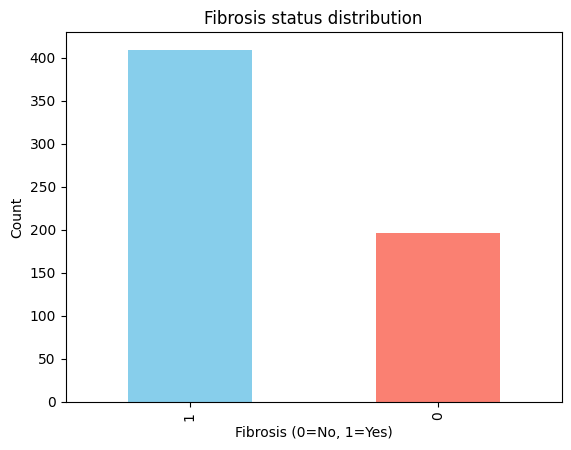

Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)
1    67.603306
0    32.396694
Name: proportion, dtype: float64


In [33]:
import matplotlib.pyplot as plt


y.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Fibrosis status distribution')
plt.xlabel('Fibrosis (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


print(y.value_counts(normalize=True) * 100)


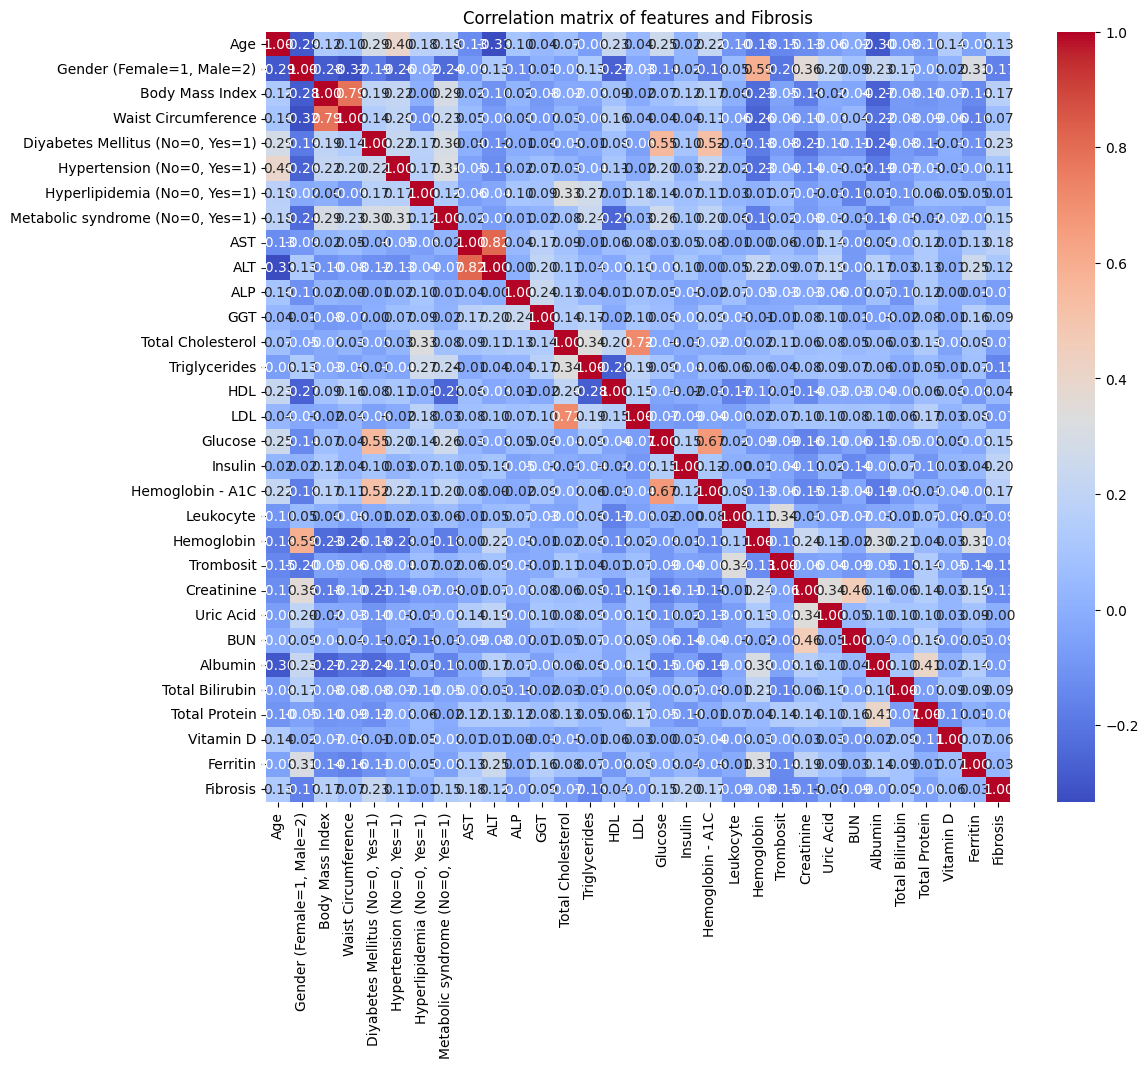

Fibrosis                            1.000000
Diyabetes Mellitus (No=0, Yes=1)    0.225755
Insulin                             0.197464
AST                                 0.177141
Body Mass Index                     0.165740
Hemoglobin - A1C                    0.165529
Metabolic syndrome (No=0, Yes=1)    0.147862
Glucose                             0.146843
Age                                 0.131911
ALT                                 0.120221
Hypertension (No=0, Yes=1)          0.113235
Total Bilirubin                     0.091926
GGT                                 0.089747
Waist Circumference                 0.068704
Vitamin D                           0.056973
HDL                                 0.044293
Ferritin                            0.033514
Hyperlipidemia (No=0, Yes=1)        0.012255
Uric Acid                          -0.003843
Total Protein                      -0.059195
ALP                                -0.067007
Albumin                            -0.070227
Total Chol

In [34]:
import seaborn as sns

# Combine X and y for correlation
data = x.copy()
data['Fibrosis'] = y

# Correlation matrix
corr = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of features and Fibrosis')
plt.show()

# Top correlations with target
print(corr['Fibrosis'].sort_values(ascending=False))


In [35]:
x.isnull().sum()

Age                                 0
Gender (Female=1, Male=2)           0
Body Mass Index                     0
Waist Circumference                 0
Diyabetes Mellitus (No=0, Yes=1)    0
Hypertension (No=0, Yes=1)          0
Hyperlipidemia (No=0, Yes=1)        0
Metabolic syndrome (No=0, Yes=1)    0
AST                                 0
ALT                                 0
ALP                                 0
GGT                                 0
Total Cholesterol                   0
Triglycerides                       0
HDL                                 0
LDL                                 0
Glucose                             0
Insulin                             0
Hemoglobin - A1C                    0
Leukocyte                           0
Hemoglobin                          0
Trombosit                           0
Creatinine                          0
Uric Acid                           0
BUN                                 0
Albumin                             0
Total Biliru

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)





# 5️⃣ Train Random Forest
rf = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=15,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

# 6️⃣ Predict and evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        39
           1       0.82      0.79      0.81        82

    accuracy                           0.74       121
   macro avg       0.71      0.72      0.71       121
weighted avg       0.75      0.74      0.75       121

ROC AUC: 0.809255784865541


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [800, 1000],
    'max_depth': [6, 8],
    'learning_rate': [0.02, 0.08],
    'subsample': [0.75, 1],
    'colsample_bytree': [0.75,1],
    
}

xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    tree_method='gpu_hist',
    use_label_encoder=False
)

# Stratified K-Fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='roc_auc_ovr',  # for multi-class ROC AUC
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best XGBoost parameters:", grid_xgb.best_params_)

# Evaluate on test set
best_xgb = grid_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)

print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC AUC (OVR):", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\zgibio\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\zgibio\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'colsample_bytree': 1, 'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.75}
=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        39
           1       0.82      0.82      0.82        82

    accuracy                           0.75       121
   macro avg       0.72      0.72      0.72       121
weighted avg       0.75      0.75      0.75       121



c:\Users\zgibio\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\zgibio\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the

ValueError: y should be a 1d array, got an array of shape (121, 2) instead.